### Segmentation with Meanshift

Please set the permission of the notebook to anyone with link can access, but with `Viewer` restriction.

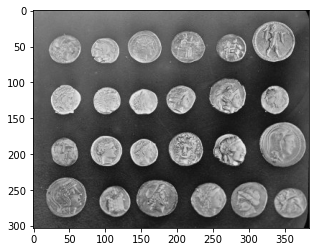

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import io



coins = data.coins()
h, w = coins.shape
plt.imshow(coins, cmap='gray');

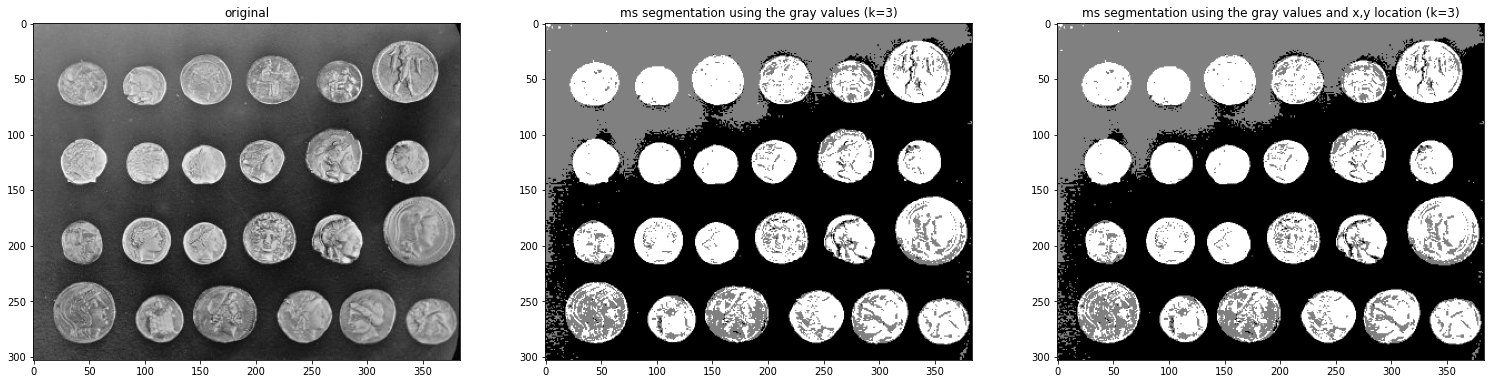

In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 12))
image_sum_check = np.sum(coins)

# First you need to convert the 2d image into vector (in feature space), for color image, we have x = [r, g, b] for example, for gray image, we could use x = [gray_value]
coins_reshape = coins.reshape(-1, 1) / 255.

# xy position
xys = np.array([[i/h, j/w] for i in range(h) for j in range(w)])
coins_all = np.hstack((coins_reshape, xys))

# Then use Meanshift, you could give a bandwidth yourself or use estimate_bandwidth, in which case you could play around with the quantile value

bandwidth = estimate_bandwidth(coins_reshape, quantile =0.2 ,n_samples = 350 )
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(coins_reshape)
labels = ms.labels_.reshape(h, w)
ms_all = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_all.fit(coins_reshape)
labels_all = ms_all.labels_.reshape(h, w)

assert image_sum_check == np.sum(coins)



# Finally visualize the segmentation (plot imshow), the segmentation does not need to be perfect, but it should segment the coins into the same class
axes[0].imshow(coins, cmap ="gray")
axes[0].set_title('original')
axes[1].imshow(labels, cmap='gray')
axes[1].set_title(f'ms segmentation using the gray values (k={len(set(labels.reshape(-1)))})');
axes[2].imshow(labels_all, cmap='gray')
axes[2].set_title(f'ms segmentation using the gray values and x,y location (k={len(set(labels_all.reshape(-1)))})');

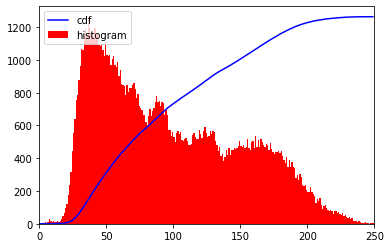

In [3]:
hist,bins = np.histogram(coins.flatten(),250,[0,250])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(coins.flatten(),250,[0,250], color = 'r')
plt.xlim([0,250])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [4]:
equ = cv2.equalizeHist(coins)

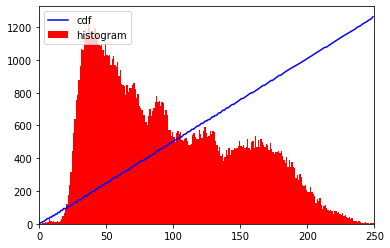

In [5]:
hist,bins = np.histogram(equ.flatten(),250,[0,250])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(coins.flatten(),250,[0,250], color = 'r')
plt.xlim([0,250])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Challenge

If you used only gray level values as the feature in previous task, try incorporating location information (i.e. `x` and `y`) into the feature vector and see how that affects the segmentation result.